# RESUMO

## Sobre a pesquisa Pense 2015

A base de dados estudada nesse módulo é do IBGE, chamada Pense (Pesquisa Nacional da Saúde do Escolar). Podemos entender, através dela, a relação entre saúde e educação e como o ambiente de vivência do estudante pode influenciar na qualidade de seu desenvolvimento escolar e vice-versa.

Essa pesquisa foi feita em 2009 e 2012 para alunos do 9° ano. Na edição de 2015, importantes inovações foram introduzidas na pesquisa, dentre as quais se destaca a disponibilização de informações oriundas de dois planos amostrais distintos: escolares frequentando o 9o ano do ensino fundamental e escolares de 13 a 17 anos de idade frequentando as etapas do 6o ao 9o ano do ensino fundamental (antigas 5a a 8a séries) e da 1a a 3a série do ensino médio.

## Sobre a análise

Será feita uma EDA (Exploratory Data Analysis) sobre a pesquisa Pense 2015.

Inicialmente, essa análise será feita sobre algumas variáveis específicas, para conhecermos seus dados e suas distribuições, como peso, altura, IMC, sexo, raça e outras. 

A análise principal será voltada para o entendimento da relação entre idade, sexo e raça com o o IMC e a satisfação dos alunos com o corpo, verificando quais variáveis podem influenciar nesse item e como o próprio IMC pode influenciar nessa satisfação corporal.

## Links e fontes

* Link da pesquisa: https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e
* Link do dataset: https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=microdados
* Especificações de tabelas e indicadores Amostra2 : https://ftp.ibge.gov.br/pense/2015/microdados/Notas_Metodologicas/Nota_metodologica_03_especificacao_tabelas_Amostra_2_20180514.pdf

# IMPORTS, DADOS E FUNÇÕES AUXILIARES

## Imports de bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot
from scipy.stats import norm
import datetime
from datetime import date
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image, HTML

import plotly.io as pio
pio.renderers

pio.renderers.default = "svg"

## Carregamento dos dados

In [3]:
dados = pd.read_csv('dados/PENSE_AMOSTRA2_ALUNO.CSV', sep = ';', thousands = '.', decimal = ',')

In [4]:
dados.sample(5)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
2040,2015,76,1,1,2,4,12,4,9,1,...,1123,1,404.965321,1,1,2,-1,2041,46,439
7280,2015,76,3,1,2,1,14,8,6,1,...,3221,3,930.497087,1,2,4,1,7281,162,538
695,2015,76,1,1,1,1,13,2,8,1,...,1123,1,391.865621,2,1,2,-1,696,17,403
13692,2015,76,5,1,2,4,15,2,6,1,...,521,5,666.570870,1,2,4,1,13693,312,155
6052,2015,76,2,1,1,2,11,12,9,1,...,2123,2,644.845474,1,1,2,-1,6053,137,54


## Funções auxiliares

### Formatação de floats

In [5]:
def formata_float_df(df):
    for i in range(0, len(df.values)):
        df.values[i] = "%.2f" % df.values[i]
        df.values[i] = float(df.values[i])

# DESCRIÇÃO DOS DADOS

### Tamanho do dataset

In [6]:
print(f'Número de linhas do dataset: {dados.shape[0]}')
print(f'Número de colunas do dataset: {dados.shape[1]}')

Número de linhas do dataset: 16556
Número de colunas do dataset: 181


### Tipos de dados

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


# ESTATÍSTICA DESCRITIVA

### Raça

#### Número de respondentes de acordo com a raça

In [8]:
# lista com as labels
raca = ['Branca', 'Preta', 'Amarela', 'Parda', 'Indígena', 'Não informado']

# criando o dataframe que contem o número de respondentes sobre a raça
raca_abs = pd.DataFrame(dados['VB01002'].value_counts().sort_index())
raca_abs.index = raca
raca_abs.index.name = 'Raça'
raca_abs.columns = ['Nº de respondentes']

raca_abs

,Nº de respondentes
Raça,
Branca,6575
Preta,1939
Amarela,712
Parda,6726
Indígena,581
Não informado,23


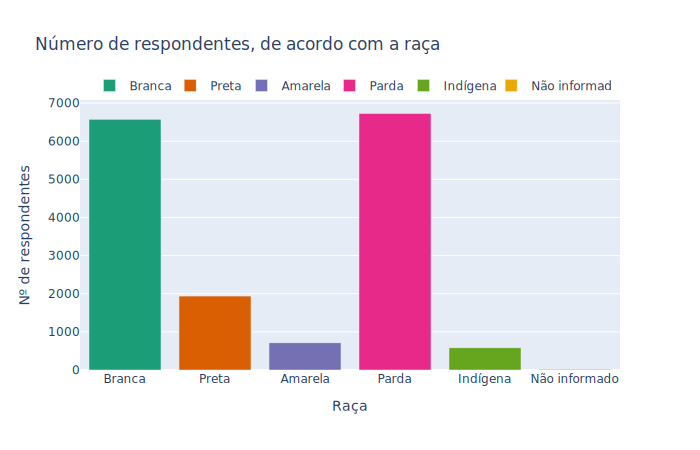

In [9]:
fig = px.bar(data_frame = raca_abs, x = raca_abs.index, y = 'Nº de respondentes',
               color = raca_abs.index, color_discrete_sequence=px.colors.qualitative.Dark2,
               title = 'Número de respondentes, de acordo com a raça')
fig.update_layout(font_family="Rockwell", legend=dict(
                  title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"))
fig.show()


#### Porcentagens de respondentes de acordo com a raça

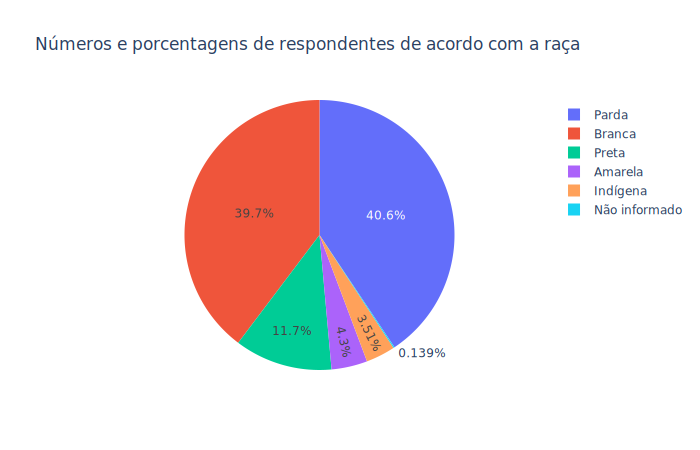

In [10]:
fig = px.pie(raca_abs,
             values='Nº de respondentes',
             names= raca_abs.index,
             labels = raca_abs.index,
             title='Números e porcentagens de respondentes de acordo com a raça')
fig.show()

### Sexo

#### Número de respondentes de acordo com o sexo

In [11]:
# criação do dataframe
resp_por_sexo = pd.DataFrame(dados['VB01001'].value_counts())
resp_por_sexo.index = ['Masculino', 'Feminino']
resp_por_sexo.index.name = 'Sexo'
resp_por_sexo.columns = ['Número de respondentes']
resp_por_sexo

,Número de respondentes
Sexo,
Masculino,8287
Feminino,8269


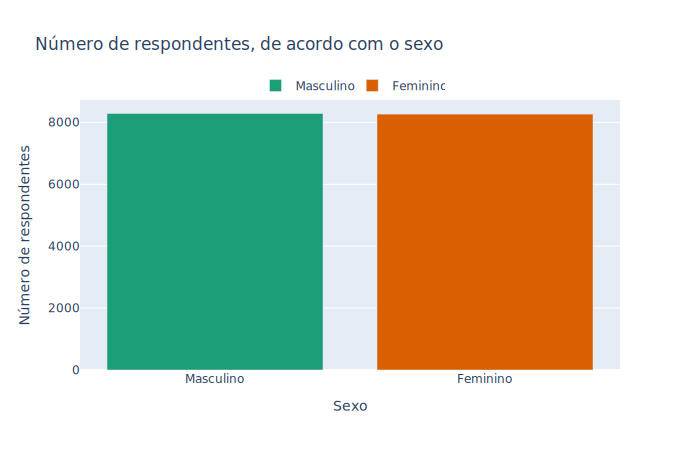

In [12]:
fig = px.bar(data_frame = resp_por_sexo, x = resp_por_sexo.index, y = 'Número de respondentes',
               color = resp_por_sexo.index, color_discrete_sequence=px.colors.qualitative.Dark2,
               title = 'Número de respondentes, de acordo com o sexo')
fig.update_layout(font_family="Rockwell", legend=dict(
                  title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"))
fig.show()


A quantidade de alunos, respondentes da pesquisa, de cada sexo foi extremamente equilibrada.

#### Porcentagens de respondentes de acordo com o sexo

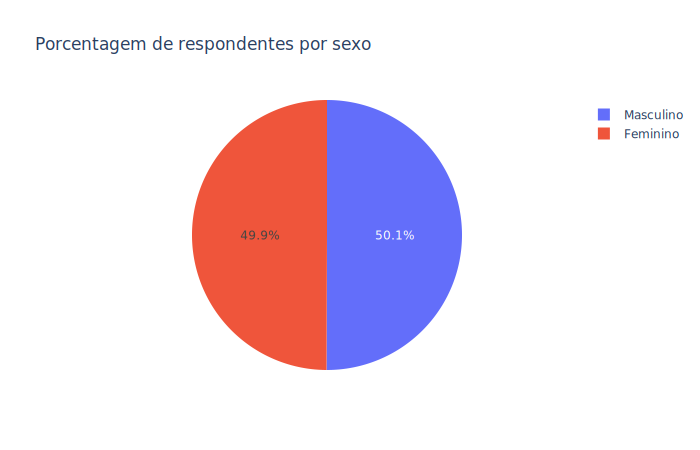

In [13]:
fig = px.pie(resp_por_sexo, values = 'Número de respondentes', names = resp_por_sexo.index,
             labels = resp_por_sexo.index, title = 'Porcentagem de respondentes por sexo')
fig.show()

### Peso

#### Estatísticas dos <ins>pesos</ins>

Média

In [14]:
media_pesos = dados['VB17003'].mean()
print(f'Média dos pesos dos alunos: {media_pesos}')

Média dos pesos dos alunos: 54.70558105822677


Mediana

In [15]:
mediana_pesos = dados['VB17003'].median()
print(f'Média dos pesos dos alunos: {mediana_pesos}')

Média dos pesos dos alunos: 52.9


Moda

In [16]:
moda_pesos = dados['VB17003'].mode()[0]
print(f'Moda dos pesos dos alunos: {moda_pesos}') 

Moda dos pesos dos alunos: 50.0


Desvio Padrão

In [17]:
desvio_padrao_pesos = dados['VB17003'].std()
print(f'Média dos pesos dos alunos: {desvio_padrao_pesos}')

Média dos pesos dos alunos: 14.547864125282576


#### Estatísticas dos <ins>pesos</ins> X <ins>classe de idade</ins>

Criando a coluna CLASSE_IDADE 

In [18]:
dados['CLASSE_IDADE'] = pd.cut(x = dados['VB01003'],
                               bins = np.histogram_bin_edges(dados['VB01003'], bins = 4),
                               include_lowest=True)
dados['CLASSE_IDADE'] = dados['CLASSE_IDADE'].astype(str)

In [19]:
dados['CLASSE_IDADE'] = dados['CLASSE_IDADE'].astype(str)

Média dos pesos por classe de idade

In [20]:
media_peso_classes_idades = pd.DataFrame(dados.groupby('CLASSE_IDADE')['VB17003'].mean())
media_peso_classes_idades.columns = ['Média dos pesos']
media_peso_classes_idades.index.name = 'Classes das Idades'

formata_float_df(media_peso_classes_idades)
media_peso_classes_idades

,Média dos pesos
Classes das Idades,
"(10.999, 13.0]",47.88
"(13.0, 15.0]",57.80
"(15.0, 17.0]",61.72
"(17.0, 19.0]",64.22


Mediana dos pesos por classe de idade

In [21]:
mediana_pesos_por_classe_idade = pd.DataFrame(dados.groupby('CLASSE_IDADE')['VB17003'].median())
mediana_pesos_por_classe_idade.columns = ['Mediana dos pesos']
mediana_pesos_por_classe_idade.index.name = 'Classes das Idades'

mediana_pesos_por_classe_idade

,Mediana dos pesos
Classes das Idades,
"(10.999, 13.0]",46.1
"(13.0, 15.0]",55.5
"(15.0, 17.0]",59.1
"(17.0, 19.0]",61.8


Moda dos pesos por classe de idade

In [22]:
lista_valores_classe_idade = dados['CLASSE_IDADE'].unique()
len_valores_classe_idade = len(lista_valores_classe_idade)
lista = []
for i in range(0, len_valores_classe_idade):
    lista.append(dados['VB17003'][dados['CLASSE_IDADE'] == lista_valores_classe_idade[i]].mode()[0])
modas_classe_idade = pd.DataFrame({'Moda': lista}, index = lista_valores_classe_idade)
modas_classe_idade.index.name = 'Classes das idades'
modas_classe_idade

,Moda
Classes das idades,
"(10.999, 13.0]",40.2
"(13.0, 15.0]",52.5
"(15.0, 17.0]",58.4
"(17.0, 19.0]",55.5


Desvio padrão dos pesos por classe de idade

In [23]:
desvios_padrao_pesos_por_classe_idade = pd.DataFrame(dados.groupby('CLASSE_IDADE')['VB17003'].std())
desvios_padrao_pesos_por_classe_idade.columns = ['Desvio padrão dos pesos']
desvios_padrao_pesos_por_classe_idade.index.name = 'Classes das idades'
desvios_padrao_pesos_por_classe_idade

,Desvio padrão dos pesos
Classes das idades,
"(10.999, 13.0]",12.403063
"(13.0, 15.0]",13.257467
"(15.0, 17.0]",13.890515
"(17.0, 19.0]",14.641708


#### Estatísticas dos <ins>pesos</ins> X <ins>sexo e classe de idade</ins>

Média dos pesos de acordo com o sexo e classe de idade

In [24]:
crosstab_media_peso_sexo_idade = pd.crosstab(index = dados['CLASSE_IDADE'],
                                       columns=dados['VB01001'],
                                       values = dados['VB17003'],
                                       aggfunc='mean')

crosstab_media_peso_sexo_idade.index.name = 'Classes das idades'
crosstab_media_peso_sexo_idade.columns.name = ''
crosstab_media_peso_sexo_idade.columns = ['Masculino', 'Feminino']
print('Média dos pesos por classe de idade e sexo: ')
crosstab_media_peso_sexo_idade

Média dos pesos por classe de idade e sexo: 


,Masculino,Feminino
Classes das idades,,
"(10.999, 13.0]",47.712934,48.043317
"(13.0, 15.0]",60.264050,55.274689
"(15.0, 17.0]",65.990985,57.422380
"(17.0, 19.0]",68.128195,58.921173


Mediana dos pesos de acordo com o sexo e classe de idade

In [25]:
crosstab_mediana_peso_sexo_idade = pd.crosstab(index = dados['CLASSE_IDADE'],
                                       columns=dados['VB01001'],
                                       values = dados['VB17003'],
                                       aggfunc='median')

crosstab_mediana_peso_sexo_idade.index.name = 'Classes das idades'
crosstab_mediana_peso_sexo_idade.columns.name = ''
crosstab_mediana_peso_sexo_idade.columns = ['Masculino', 'Feminino']
print('Mediana dos pesos por classe de idade e sexo: ')
crosstab_mediana_peso_sexo_idade

Mediana dos pesos por classe de idade e sexo: 


,Masculino,Feminino
Classes das idades,,
"(10.999, 13.0]",45.5,46.6
"(13.0, 15.0]",58.0,53.0
"(15.0, 17.0]",62.8,55.3
"(17.0, 19.0]",65.5,56.4


Moda dos pesos de acordo com o sexo e classe de idade

In [26]:
valores_classes_idade = dados['CLASSE_IDADE'].unique()
valores_sexo = dados['VB01001'].sort_values().unique()
lista_masculino = []
lista_feminino = []

for classe in valores_classes_idade:
    for sexo in valores_sexo:
        if sexo == 1:
            lista_masculino.append(dados['VB17003'][(dados['VB01001'] == sexo) & (dados['CLASSE_IDADE'] == classe)].mode()[0])
        elif sexo == 2:
            lista_feminino.append(dados['VB17003'][(dados['VB01001'] == sexo) & (dados['CLASSE_IDADE'] == classe)].mode()[0])

In [27]:
df_moda_peso_sexo_idade = pd.DataFrame([lista_masculino, lista_feminino]).T
df_moda_peso_sexo_idade.columns = ['Masculino', 'Feminino']
df_moda_peso_sexo_idade.index = valores_classes_idade
df_moda_peso_sexo_idade

,Masculino,Feminino
"(10.999, 13.0]",41.3,42.5
"(13.0, 15.0]",60.1,46.7
"(15.0, 17.0]",61.6,49.0
"(17.0, 19.0]",57.8,50.3


##### Desvios padrão dos pesos de acordo com o sexo e com a classe de idade

In [28]:
desvio_padrao_pesos_sexo_idade = pd.crosstab(index = dados['CLASSE_IDADE'],
            columns = dados['VB01001'],
            values = dados['VB17003'],
            aggfunc='std')
desvio_padrao_pesos_sexo_idade.columns = ['Masculino', 'Feminino']
desvio_padrao_pesos_sexo_idade.index.name = 'Classes das idades'
print('Desvios padrão dos pesos de acordo com o sexo e com a classe de idade:')
desvio_padrao_pesos_sexo_idade

Desvios padrão dos pesos de acordo com o sexo e com a classe de idade:


,Masculino,Feminino
Classes das idades,,
"(10.999, 13.0]",13.327306,11.455307
"(13.0, 15.0]",14.142475,11.764680
"(15.0, 17.0]",14.445574,11.850257
"(17.0, 19.0]",14.444571,13.182701


#### Alguns gráficos

##### Histograma - Distribuição geral dos pesos

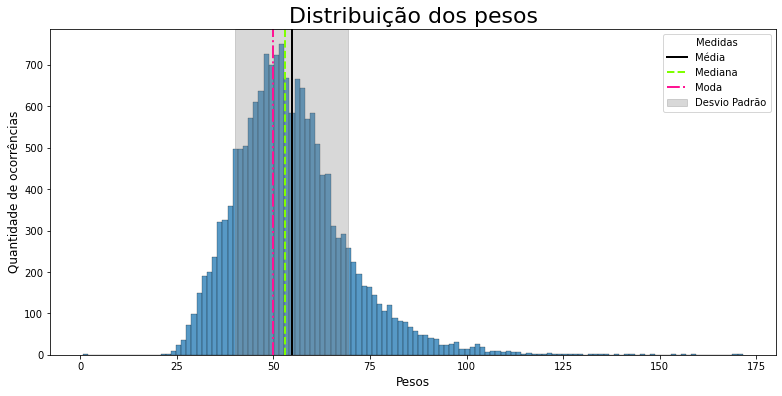

In [29]:
ax = sns.histplot(data = dados, x = 'VB17003')
ax.figure.set_size_inches((13, 6))
ax.set_title('Distribuição dos pesos', fontsize = 22)
ax.set_xlabel('Pesos', fontsize = 12)
ax.set_ylabel('Quantidade de ocorrências', fontsize = 12)

# linha com a média dos pesos
ax.axvline(x = dados['VB17003'].mean(),
           label = 'Média',
           linewidth = 2,
           color = '#000000')
# linha com a mediana dos pesos
ax.axvline(x = dados['VB17003'].median(),
           label = 'Mediana',
           linewidth = 2,
           linestyle = '--',
           color = '#7FFF00')
#linha com a moda dos pesos
ax.axvline(x = dados['VB17003'].mode().values,
           label = 'Moda',
           linewidth = 2,
           linestyle = '-.',
           color = '#FF1493')

# intervalo de confiança da distribuição dos pesos
xmin = media_pesos - desvio_padrao_pesos
xmax = media_pesos + desvio_padrao_pesos
# área do desvio padrão
ax.axvspan(xmin, xmax, alpha=0.3, color='gray', label='Desvio Padrão')

ax.legend(title = 'Medidas')
ax;

##### Boxplot - distribuição dos pesos de acordo com a classe de idade

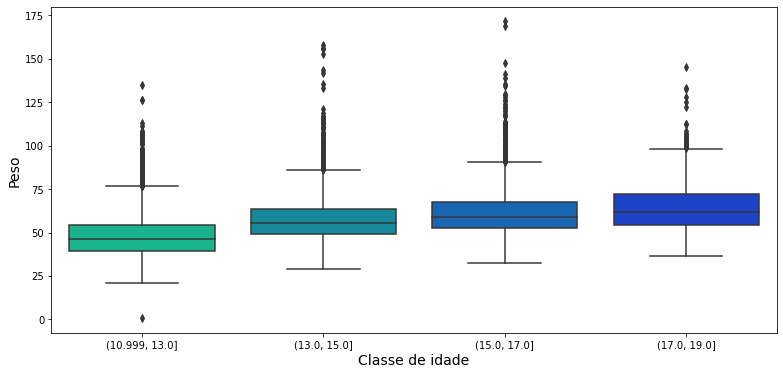

In [30]:
ax = sns.boxplot(x = dados['CLASSE_IDADE'], y = dados['VB17003'], palette = 'winter_r')
ax.figure.set_size_inches((13,6))
ax.set_xlabel('Classe de idade', fontsize = 14)
ax.set_ylabel('Peso', fontsize = 14)
ax;

##### Boxplot - Distribuição dos pesos de acordo com o sexo e classe de idade

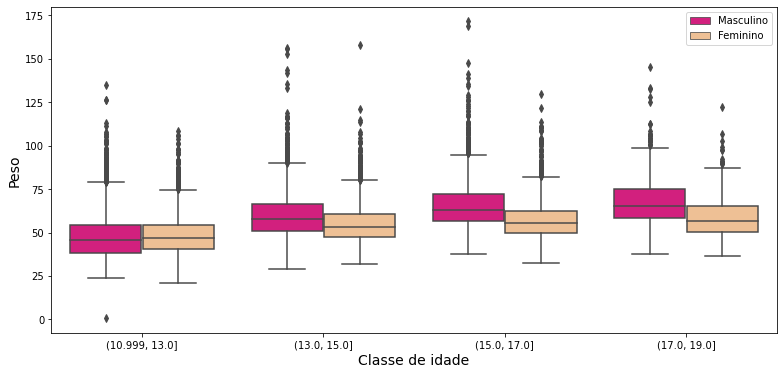

In [31]:
ax = sns.boxplot(data = dados,
                 x = 'CLASSE_IDADE',
                 y = 'VB17003',
                 hue = 'VB01001', palette = 'Accent_r')
ax.figure.set_size_inches((13,6))
ax.set_xlabel('Classe de idade', fontsize = 14)
ax.set_ylabel('Peso', fontsize = 14)
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ["Masculino", "Feminino"], loc="best")
ax;

### Altura

#### Estatísticas da <ins>altura</ins>

Média

In [32]:
media_altura = dados['VB17004'].mean()
print(f'Média da altura: {media_altura}')

Média da altura: 160.71311307078818


Mediana

In [33]:
mediana_altura = dados['VB17004'].median()
print(f'Média da altura: {mediana_altura}')

Média da altura: 160.4


Moda

In [34]:
moda_altura = dados['VB17004'].mode()[0]
print(f'Média da altura: {moda_altura}')

Média da altura: 160.0


Desvio Padrão

In [35]:
desvio_padrao_altura = dados['VB17004'].std()
print(f'Média da altura: {desvio_padrao_altura}')

Média da altura: 10.3400702338278


##### Unificação das estatísticas (dataframe)

In [36]:
df_estatisticas_altura = pd.DataFrame([media_altura, mediana_altura, moda_altura,
                                       desvio_padrao_altura],
             index = ['Media', 'Mediana', 'Moda', 'Desvio Padrão'])
formata_float_df(df_estatisticas_altura)
df_estatisticas_altura.columns = ['']
df_estatisticas_altura

,
Media,160.71
Mediana,160.40
Moda,160.00
Desvio Padrão,10.34


##### Histograma - Distribuição da altura 

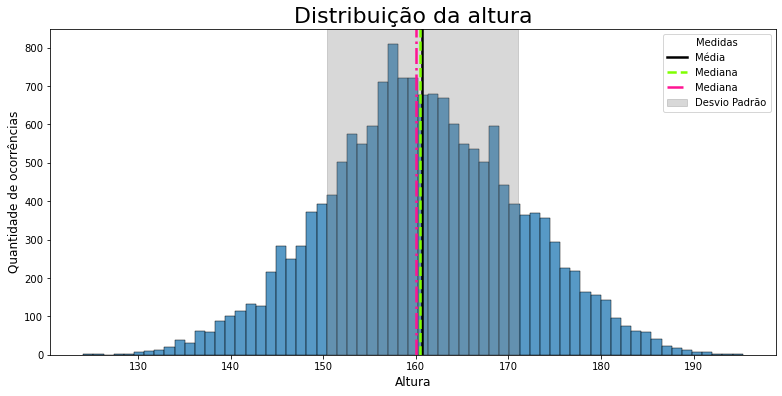

In [37]:
ax = sns.histplot(data = dados, x = 'VB17004')
ax.figure.set_size_inches((13, 6))
ax.set_title('Distribuição da altura', fontsize = 22)
ax.set_xlabel('Altura', fontsize = 12)
ax.set_ylabel('Quantidade de ocorrências', fontsize = 12)

# linha com a média para o histograma
ax.axvline(x = dados['VB17004'].mean(), linestyle = '-', linewidth = 2.5,
           label = 'Média',
           color = '#000000')

# linha com a mediana para o histograma
ax.axvline(x = dados['VB17004'].median(), linestyle = '--', linewidth = 2.5,
           label = 'Mediana',
           color = '#7FFF00')

# linha com a moda para o histograma
ax.axvline(x = dados['VB17004'].mode()[0], linestyle = '-.', linewidth = 2.5,
           label = 'Mediana',
           color = '#FF1493')

# intervalo de confiança da distribuição dos pesos
xmin = media_altura - desvio_padrao_altura
xmax = media_altura + desvio_padrao_altura
# área do desvio padrão
ax.axvspan(xmin, xmax, alpha=0.3, color='gray', label='Desvio Padrão')

ax.legend(title = 'Medidas')
ax;

#### Estatísticas da <ins>altura</ins>  X  <ins>classe de idade</ins>

Médias das alturas por classe de idade

In [38]:
media_alturas_por_classe_idade = pd.DataFrame(dados.groupby('CLASSE_IDADE')['VB17004'].mean())
media_alturas_por_classe_idade.index.name = 'Classe da idade'
media_alturas_por_classe_idade.columns = ['Média da altura por classe de idade']
media_alturas_por_classe_idade

,Média da altura por classe de idade
Classe da idade,
"(10.999, 13.0]",154.438943
"(13.0, 15.0]",164.351865
"(15.0, 17.0]",166.808537
"(17.0, 19.0]",166.994156


Medianas das alturas por classe de idade

In [39]:
mediana_alturas_por_classe_idade = pd.DataFrame(dados.groupby('CLASSE_IDADE')['VB17004'].median())
media_alturas_por_classe_idade.index.name = 'Classe da idade'
media_alturas_por_classe_idade.columns = ['Mediana da altura por classe de idade']
mediana_alturas_por_classe_idade

,VB17004
CLASSE_IDADE,
"(10.999, 13.0]",154.5
"(13.0, 15.0]",164.0
"(15.0, 17.0]",166.6
"(17.0, 19.0]",167.2


Modas das alturas por classe de idade

In [40]:
lista_valores_classe_idade = dados['CLASSE_IDADE'].unique()
len_valores_classe_idade = len(lista_valores_classe_idade)
lista = []
for i in range(0, len_valores_classe_idade):
    lista.append(dados['VB17004'][dados['CLASSE_IDADE'] == lista_valores_classe_idade[i]].mode()[0])
df_modas_classe_idade = pd.DataFrame({'Moda': lista}, index = lista_valores_classe_idade)
df_modas_classe_idade.index.name = 'Classe (idade)'
df_modas_classe_idade

,Moda
Classe (idade),
"(10.999, 13.0]",153.0
"(13.0, 15.0]",160.0
"(15.0, 17.0]",160.0
"(17.0, 19.0]",175.0


Desvios padrão das alturas por classe de idade

In [41]:
desvios_padrao_altura_por_classe_idade = pd.DataFrame(dados.groupby('CLASSE_IDADE')['VB17004'].std())
desvios_padrao_altura_por_classe_idade.index.name = 'Classe de idade'
desvios_padrao_altura_por_classe_idade.columns = ['Desvio padrão por classe de idade']
desvios_padrao_altura_por_classe_idade

,Desvio padrão por classe de idade
Classe de idade,
"(10.999, 13.0]",8.721425
"(13.0, 15.0]",8.163641
"(15.0, 17.0]",8.910585
"(17.0, 19.0]",9.715768


#### Estatísticas das <ins>alturas</ins>  X  <ins>sexo e classe de idade</ins>

Valores mínimo e máximo das alturas X sexo e classe de idade

In [42]:
minimo_altura_sexo_idade = pd.crosstab(index = dados['CLASSE_IDADE'],
            columns = dados['VB01001'],
            values = dados['VB17004'],
            aggfunc = 'min')
minimo_altura_sexo_idade.index.name = 'Classes de idade'
minimo_altura_sexo_idade.columns.name = ''
minimo_altura_sexo_idade.columns = ['Masculino', 'Feminino']
print('Valores mínimos das alturas por sexo e idade:')
minimo_altura_sexo_idade

Valores mínimos das alturas por sexo e idade:


,Masculino,Feminino
Classes de idade,,
"(10.999, 13.0]",124.1,126.0
"(13.0, 15.0]",140.4,139.0
"(15.0, 17.0]",148.5,136.2
"(17.0, 19.0]",142.2,143.5


In [43]:
maximo_altura_sexo_idade = pd.crosstab(index = dados['CLASSE_IDADE'],
            columns = dados['VB01001'],
            values = dados['VB17004'],
            aggfunc = 'max')
maximo_altura_sexo_idade.index.name = 'Classes de idade'
maximo_altura_sexo_idade.columns.name = ''
maximo_altura_sexo_idade.columns = ['Masculino', 'Feminino']
print('Valores máximos das alturas por sexo e idade:')
maximo_altura_sexo_idade

Valores máximos das alturas por sexo e idade:


,Masculino,Feminino
Classes de idade,,
"(10.999, 13.0]",185.6,176.0
"(13.0, 15.0]",191.5,179.5
"(15.0, 17.0]",195.3,183.6
"(17.0, 19.0]",194.8,184.8


Média das alturas de acordo com o sexo e a classe de idade

In [44]:
media_alturas_sexo_idade = pd.crosstab(index = dados['CLASSE_IDADE'],
                                       columns = dados['VB01001'],
                                       values = dados['VB17004'],
                                       aggfunc = 'mean')
media_alturas_sexo_idade.columns = ['Masculino', 'Feminino']
media_alturas_sexo_idade.index.name = 'Classes das idades'
print('Médias das alturas por sexo e por idade')
media_alturas_sexo_idade

Médias das alturas por sexo e por idade


,Masculino,Feminino
Classes das idades,,
"(10.999, 13.0]",154.579384,154.305475
"(13.0, 15.0]",168.514744,160.089165
"(15.0, 17.0]",172.993658,160.594102
"(17.0, 19.0]",172.709774,159.237245


Mediana das alturas de acordo com o sexo e a classe de idade

In [45]:
mediana_alturas_sexo_idade = pd.crosstab(index = dados['CLASSE_IDADE'],
                                       columns = dados['VB01001'],
                                       values = dados['VB17004'],
                                       aggfunc = 'median')
mediana_alturas_sexo_idade.columns = ['Masculino', 'Feminino']
mediana_alturas_sexo_idade.index.name = 'Classes das idades'
print('Medianas das alturas por sexo e por idade')
mediana_alturas_sexo_idade

Medianas das alturas por sexo e por idade


,Masculino,Feminino
Classes das idades,,
"(10.999, 13.0]",154.2,154.80
"(13.0, 15.0]",168.9,160.00
"(15.0, 17.0]",173.0,160.50
"(17.0, 19.0]",173.0,158.65


Moda dos pesos de acordo com o sexo e classe de idade

In [46]:
valores_classes_idade = dados['CLASSE_IDADE'].unique()
valores_sexo = dados['VB01001'].sort_values().unique()
lista_masculino = []
lista_feminino = []

for classe in valores_classes_idade:
    for sexo in valores_sexo:
        if sexo == 1:
            lista_masculino.append(dados['VB17004'][(dados['VB01001'] == sexo) & (dados['CLASSE_IDADE'] == classe)].mode()[0])
        elif sexo == 2:
            lista_feminino.append(dados['VB17004'][(dados['VB01001'] == sexo) & (dados['CLASSE_IDADE'] == classe)].mode()[0])

In [47]:
df_moda_alturas_sexo_idade = pd.DataFrame([lista_masculino, lista_feminino]).T
df_moda_alturas_sexo_idade.index = [valores_classes_idade]
df_moda_alturas_sexo_idade.columns = ['Masculino', 'Feminino']
df_moda_alturas_sexo_idade

,Masculino,Feminino
"(10.999, 13.0]",155.0,157.0
"(13.0, 15.0]",170.0,160.0
"(15.0, 17.0]",171.0,160.0
"(17.0, 19.0]",175.0,156.0


Desvios padrão das alturas de acordo com o sexo e a classe de idade

In [48]:
desvio_padrao_alturas_sexo_idade = pd.crosstab(index = dados['CLASSE_IDADE'],
            columns = dados['VB01001'],
            values = dados['VB17004'],
            aggfunc='std')
desvio_padrao_alturas_sexo_idade.columns = ['Masculino', 'Feminino']
desvio_padrao_alturas_sexo_idade.index.name = 'Classes das idades'
desvio_padrao_alturas_sexo_idade

,Masculino,Feminino
Classes das idades,,
"(10.999, 13.0]",9.828284,7.518968
"(13.0, 15.0]",7.822763,6.026866
"(15.0, 17.0]",6.763838,6.012660
"(17.0, 19.0]",7.382497,6.636610


#### Alguns gráficos

##### Histograma - Distribuição geral das alturas

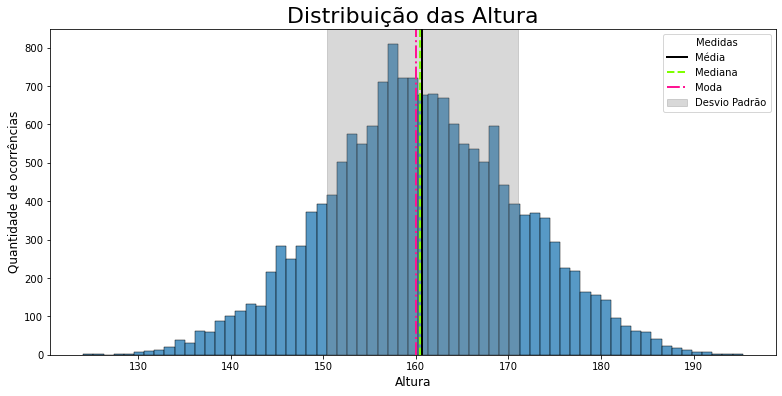

In [49]:
ax = sns.histplot(data = dados, x = 'VB17004')
ax.figure.set_size_inches((13, 6))
ax.set_title('Distribuição das Altura', fontsize = 22)
ax.set_xlabel('Altura', fontsize = 12)
ax.set_ylabel('Quantidade de ocorrências', fontsize = 12)

# linha com a média dos pesos
ax.axvline(x = dados['VB17004'].mean(),
           label = 'Média',
           linewidth = 2,
           color = '#000000')
# linha com a mediana dos pesos
ax.axvline(x = dados['VB17004'].median(),
           label = 'Mediana',
           linewidth = 2,
           linestyle = '--',
           color = '#7FFF00')
#linha com a moda dos pesos
ax.axvline(x = dados['VB17004'].mode().values,
           label = 'Moda',
           linewidth = 2,
           linestyle = '-.',
           color = '#FF1493')

# intervalo de confiança da distribuição dos pesos
xmin = media_altura - desvio_padrao_altura
xmax = media_altura + desvio_padrao_altura
# área do desvio padrão
ax.axvspan(xmin, xmax, alpha=0.3, color='gray', label='Desvio Padrão')

ax.legend(title = 'Medidas')
ax;

##### Boxplot - distribuição das alturas de acordo com a classe de idade

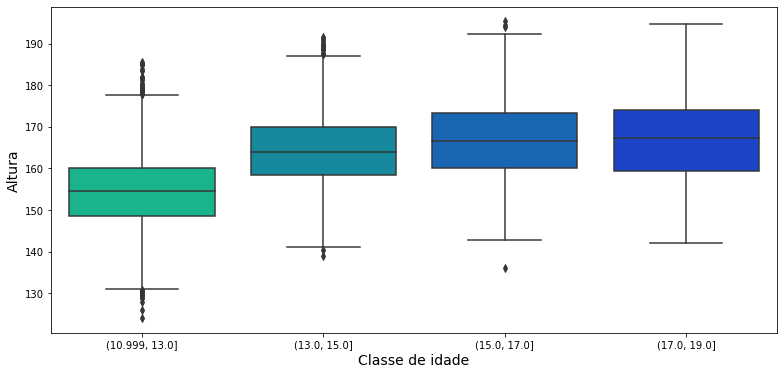

In [50]:
ax = sns.boxplot(x = dados['CLASSE_IDADE'], y = dados['VB17004'], palette = 'winter_r')
ax.figure.set_size_inches((13,6))
ax.set_xlabel('Classe de idade', fontsize = 14)
ax.set_ylabel('Altura', fontsize = 14)
ax;

##### Boxplot - Distribuição das alturas de acordo com o sexo e classe de idade

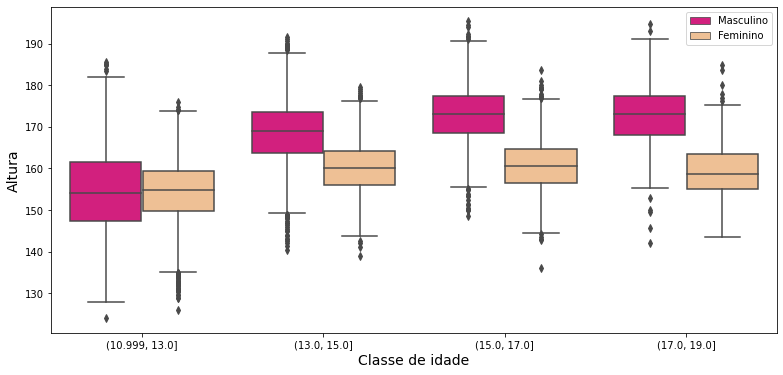

In [51]:
ax = sns.boxplot(data = dados,
                 x = 'CLASSE_IDADE',
                 y = 'VB17004',
                 hue = 'VB01001', palette = 'Accent_r')
ax.figure.set_size_inches((13,6))
ax.set_xlabel('Classe de idade', fontsize = 14)
ax.set_ylabel('Altura', fontsize = 14)
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ["Masculino", "Feminino"], loc="best")
ax;

### IMC

#### Criação das colunas IMC

In [52]:
dados['IMC'] = dados['VB17003'] / ((dados['VB17004']/100)**2)

#### Estatísticas sobre o <ins>IMC</ins>

Valores mínimo e máximo da coluna IMC

In [53]:
min_max_imc = pd.DataFrame([dados['IMC'].min(), dados['IMC'].max()])
min_max_imc.index = ['Mínimo', 'Máximo']
min_max_imc.columns = ['Valores mínimo e máximo do IMC']
min_max_imc

,Valores mínimo e máximo do IMC
Mínimo,0.397867
Máximo,57.479596


Média dos IMCs 

In [54]:
media_imc = dados['IMC'].mean()
print(f'Média dos IMCs: {media_imc}')

Média dos IMCs: 20.95825220663186


Mediana dos IMCs

In [55]:
mediana_imc = dados['IMC'].median()
print(f'Mediana dos IMCs: {mediana_imc}')

Mediana dos IMCs: 20.190504330368643


Desvio Padrão dos IMCs

In [56]:
desvio_padrao_imc = dados['IMC'].std()
print(f'Desvio Padrão dos IMCs: {desvio_padrao_imc}')

Desvio Padrão dos IMCs: 4.244441438911331


#### Estatísticas sobre o <ins>IMC</ins> X <ins>classe de idade</ins>

Valores mínimo e máximo dos IMCs x classe de idade

In [57]:
minimo_imc_sexo_idade = dados.groupby('CLASSE_IDADE')['IMC'].min()
maximo_imc_sexo_idade = dados.groupby('CLASSE_IDADE')['IMC'].max()
min_max = pd.DataFrame([minimo_imc_sexo_idade, maximo_imc_sexo_idade]).T
min_max.index.name = 'Classes de idade'
min_max.columns = ['Mínimo', 'Máximo']
min_max

,Mínimo,Máximo
Classes de idade,,
"(10.999, 13.0]",0.397867,41.328125
"(13.0, 15.0]",12.738876,57.479596
"(15.0, 17.0]",14.308035,55.681366
"(17.0, 19.0]",14.568759,48.886742


Podemos perceber no dataframe acima que o valor mínimo da classe de idade entre 10.999 e 13 anos é considerado um outlier. Há uma grande probabilidade de que o valor do peso ou da altura tenha sido preenchido de forma errada. Vamos conferir:

In [58]:
df = dados[['IMC', 'VB17003', 'VB17004', 'VB01003', 'VB01001']][dados['IMC'] == 0.39786663908124625]
df.columns = ['IMC', 'Peso', 'Altura', 'Idade', 'Sexo']
df

,IMC,Peso,Altura,Idade,Sexo
15673,0.397867,0.8,141.8,12,1


Realmente: o valor do peso parece ter sido preenchido de maneira equivocada, pois o peso mínimo médio de um menino de 12 anos é de 30,48 kg, com altura mínima média de 138,1 cm.

Fonte: https://www.unimed.coop.br/web/vitoria/viver-bem/pais-e-filhos/estatura-por-idade

Média dos IMCs X classe de idade

In [59]:
media_imc_classe_idade = pd.DataFrame(dados.groupby('CLASSE_IDADE')['IMC'].mean())
media_imc_classe_idade

,IMC
CLASSE_IDADE,
"(10.999, 13.0]",19.879806
"(13.0, 15.0]",21.314796
"(15.0, 17.0]",22.103754
"(17.0, 19.0]",22.961516


Mediana dos IMCs X classe de idade

In [60]:
mediana_imc_classe_idade = pd.DataFrame(dados.groupby('CLASSE_IDADE')['IMC'].median())
mediana_imc_classe_idade

,IMC
CLASSE_IDADE,
"(10.999, 13.0]",19.088097
"(13.0, 15.0]",20.428882
"(15.0, 17.0]",21.216253
"(17.0, 19.0]",22.055502


Moda dos IMCs X classe de idade

In [61]:
lista_valores_classe_idade = dados['CLASSE_IDADE'].unique()
len_valores_classe_idade = len(lista_valores_classe_idade)
lista = []
for i in range(0, len_valores_classe_idade):
    lista.append(dados['IMC'][dados['CLASSE_IDADE'] == lista_valores_classe_idade[i]].mode().values)
df_modas_classe_idade = pd.DataFrame({'Moda': lista}, index = lista_valores_classe_idade)
df_modas_classe_idade.index.name = 'Classe (idade)'
df_modas_classe_idade

,Moda
Classe (idade),
"(10.999, 13.0]","[16.155478395061728, 19.297399236875574]"
"(13.0, 15.0]","[18.072289156626507, 19.881656804733726, 21.23..."
"(15.0, 17.0]","[21.0828132906055, 22.339876033057852]"
"(17.0, 19.0]","[19.490163952240685, 24.168312456600745, 26.29..."


Desvios padrão dos IMCs X classe de idade

In [62]:
desvio_padrao_imc_idade = pd.DataFrame(dados.groupby('CLASSE_IDADE')['IMC'].std())
desvio_padrao_imc_idade

,IMC
CLASSE_IDADE,
"(10.999, 13.0]",3.949190
"(13.0, 15.0]",4.202637
"(15.0, 17.0]",4.216353
"(17.0, 19.0]",4.541709


#### Estatísticas sobre o <ins>IMC</ins> X <ins>sexo e classe de idade</ins>

Valores mínimo e máximo dos IMCs x sexo e classe de idade

In [63]:
minimo_imc_sexo_idade = pd.crosstab(index = dados['CLASSE_IDADE'],
            columns = dados['VB01001'],
            values = dados['IMC'],
            aggfunc = 'min')
minimo_imc_sexo_idade.index.name = 'Classes de idade'
minimo_imc_sexo_idade.columns.name = ''
minimo_imc_sexo_idade.columns = ['Masculino', 'Feminino']
print('Valores mínimos dos IMCs por sexo e idade:')
minimo_imc_sexo_idade

Valores mínimos dos IMCs por sexo e idade:


,Masculino,Feminino
Classes de idade,,
"(10.999, 13.0]",0.397867,11.135383
"(13.0, 15.0]",12.738876,13.426423
"(15.0, 17.0]",14.656508,14.308035
"(17.0, 19.0]",14.737817,14.568759


In [64]:
maximo_imc_sexo_idade = pd.crosstab(index = dados['CLASSE_IDADE'],
            columns = dados['VB01001'],
            values = dados['IMC'],
            aggfunc = 'max')
maximo_imc_sexo_idade.index.name = 'Classes de idade'
maximo_imc_sexo_idade.columns.name = ''
maximo_imc_sexo_idade.columns = ['Masculino', 'Feminino']
print('Valores máximos dos IMCs por sexo e idade:')
maximo_imc_sexo_idade

Valores máximos dos IMCs por sexo e idade:


,Masculino,Feminino
Classes de idade,,
"(10.999, 13.0]",40.720936,41.328125
"(13.0, 15.0]",52.941176,57.479596
"(15.0, 17.0]",55.681366,51.021511
"(17.0, 19.0]",48.886742,44.166989


Média dos IMCs X sexo e classe de idade

In [65]:
media_imc_sexo_idade = pd.crosstab(index = dados['CLASSE_IDADE'],
            columns = dados['VB01001'],
            values = dados['IMC'],
            aggfunc = 'mean')
media_imc_sexo_idade.index.name = 'Classes de idade'
media_imc_sexo_idade.columns.name = ''
media_imc_sexo_idade.columns = ['Masculino', 'Feminino']
print('Médias dos IMCs por sexo e idade:')
media_imc_sexo_idade

Médias dos IMCs por sexo e idade:


,Masculino,Feminino
Classes de idade,,
"(10.999, 13.0]",19.720570,20.031136
"(13.0, 15.0]",21.111781,21.522679
"(15.0, 17.0]",21.982357,22.225727
"(17.0, 19.0]",22.771931,23.218809


Mediana dos IMCs X sexo e classe de idade

In [66]:
media_imc_sexo_idade = pd.crosstab(index = dados['CLASSE_IDADE'],
            columns = dados['VB01001'],
            values = dados['IMC'],
            aggfunc = 'median')
media_imc_sexo_idade.index.name = 'Classes de idade'
media_imc_sexo_idade.columns.name = ''
media_imc_sexo_idade.columns = ['Masculino', 'Feminino']
print('Medianas dos IMCs por sexo e idade:')
media_imc_sexo_idade

Medianas dos IMCs por sexo e idade:


,Masculino,Feminino
Classes de idade,,
"(10.999, 13.0]",18.812470,19.354341
"(13.0, 15.0]",20.162093,20.691020
"(15.0, 17.0]",21.044407,21.438569
"(17.0, 19.0]",21.970736,22.302957


Desvios padrão dos IMCs X sexo e classe de idade

In [67]:
valores_classes_idade = dados['CLASSE_IDADE'].unique()
valores_sexo = dados['VB01001'].sort_values().unique()
lista_masculino = []
lista_feminino = []

for classe in valores_classes_idade:
    for sexo in valores_sexo:
        if sexo == 1:
            lista_masculino.append(dados['IMC'][(dados['VB01001'] == sexo) & (dados['CLASSE_IDADE'] == classe)].mode()[0])
        elif sexo == 2:
            lista_feminino.append(dados['IMC'][(dados['VB01001'] == sexo) & (dados['CLASSE_IDADE'] == classe)].mode()[0])

In [68]:
df_moda_imc_sexo_idade = pd.DataFrame([lista_masculino, lista_feminino]).T
df_moda_imc_sexo_idade.index = [valores_classes_idade]
df_moda_imc_sexo_idade.columns = ['Masculino', 'Feminino']
df_moda_imc_sexo_idade

,Masculino,Feminino
"(10.999, 13.0]",17.659280,16.155478
"(13.0, 15.0]",18.072289,16.904342
"(15.0, 17.0]",22.339876,16.481740
"(17.0, 19.0]",14.737817,26.297753


#### Alguns gráficos

##### Histograma - Distribuição geral dos IMCs

No caso dos IMCs, temos a ocorrência de uma distribuição multimodal (11 valores). Assim, foram mostrados apenas alguns dos valores.

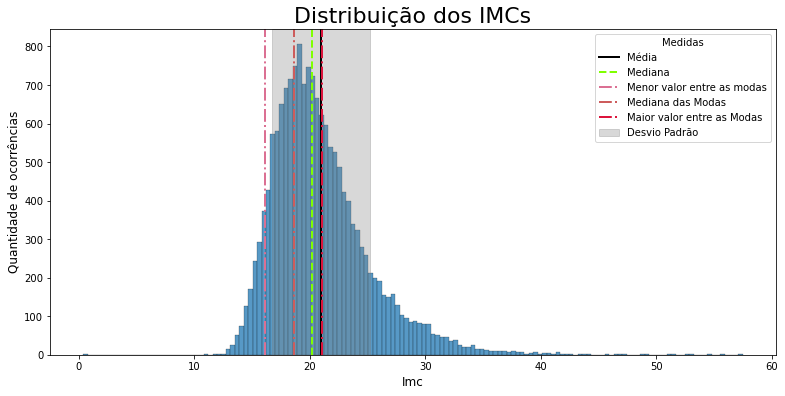

In [69]:
ax = sns.histplot(data = dados, x = 'IMC')
ax.figure.set_size_inches((13, 6))
ax.set_title('Distribuição dos IMCs', fontsize = 22)
ax.set_xlabel('Imc', fontsize = 12)
ax.set_ylabel('Quantidade de ocorrências', fontsize = 12)

# linha com a média dos pesos
ax.axvline(x = dados['IMC'].mean(),
           label = 'Média',
           linewidth = 2,
           color = '#000000')

# linha com a mediana dos pesos
ax.axvline(x = dados['IMC'].median(),
           label = 'Mediana',
           linewidth = 2,
           linestyle = '--',
           color = '#7FFF00')

#linha com a moda 0
ax.axvline(x = dados['IMC'].mode()[0],
           label = 'Menor valor entre as modas',
           linewidth = 2,
           linestyle = '-.',
           color = '#DB7093')

# linha com a moda 5
ax.axvline(x = dados['IMC'].mode()[5],
           label = 'Mediana das Modas',
           linewidth = 2,
           linestyle = '-.',
           color = '#CD5C5C')

# linha com a moda 1
ax.axvline(x = dados['IMC'].mode()[10],
           label = 'Maior valor entre as Modas',
           linewidth = 2,
           linestyle = '-.',
           color = '#DC143C')

# intervalo de confiança da distribuição dos pesos
xmin = media_imc - desvio_padrao_imc
xmax = media_imc + desvio_padrao_imc
# xmin = norm.interval(alpha = 0.95, loc = media, scale = (std / np.sqrt(n)))[0]
# xmax = norm.interval(alpha = 0.95, loc = media, scale = (std / np.sqrt(n)))[1]
# área do desvio padrão
ax.axvspan(xmin, xmax, alpha=0.3, color='gray', label='Desvio Padrão')

ax.legend(title = 'Medidas')
ax;

##### Boxplot - distribuição dos IMCs de acordo com a classe de idade

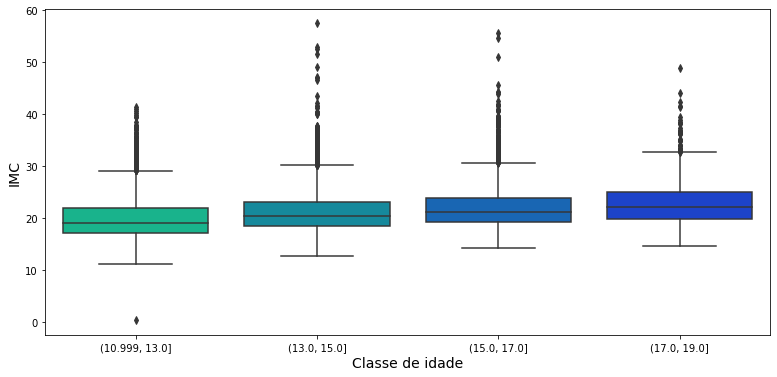

In [70]:
ax = sns.boxplot(x = dados['CLASSE_IDADE'], y = dados['IMC'], palette = 'winter_r')
ax.figure.set_size_inches((13,6))
ax.set_xlabel('Classe de idade', fontsize = 14)
ax.set_ylabel('IMC', fontsize = 14)
ax;

##### Boxplot - Distribuição dos IMCs de acordo com o sexo e classe de idade

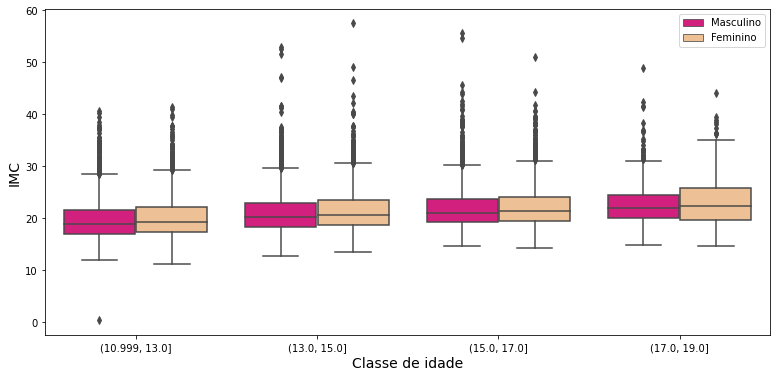

In [71]:
ax = sns.boxplot(data = dados,
                 x = 'CLASSE_IDADE',
                 y = 'IMC',
                 hue = 'VB01001', palette = 'Accent_r')
ax.figure.set_size_inches((13,6))
ax.set_xlabel('Classe de idade', fontsize = 14)
ax.set_ylabel('IMC', fontsize = 14)
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ["Masculino", "Feminino"], loc="best")
ax;

##### Boxplot - Distribuição dos IMCs de acordo com o sexo

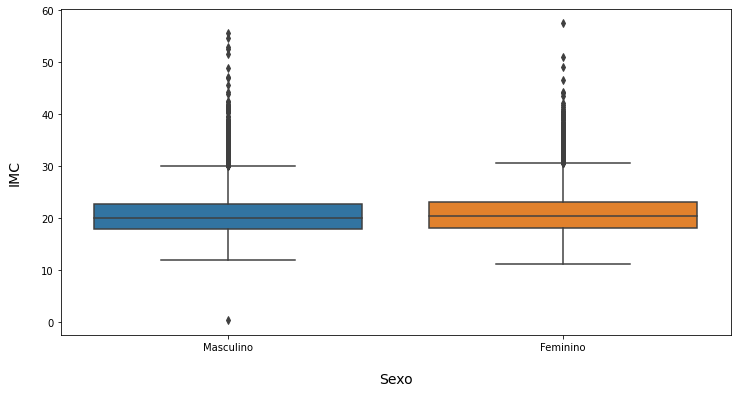

In [72]:
ax = sns.boxplot(x = dados['VB01001'], y = dados['IMC'])
ax.set_xticklabels(labels = ['Masculino', 'Feminino'])
ax.set_xlabel('Sexo', fontsize = 14, labelpad = 20)
ax.set_ylabel('IMC', fontsize = 14, labelpad = 20)
ax.figure.set_size_inches((12,6))

##### Boxplot - Distribuição dos IMCs de acordo com a raça

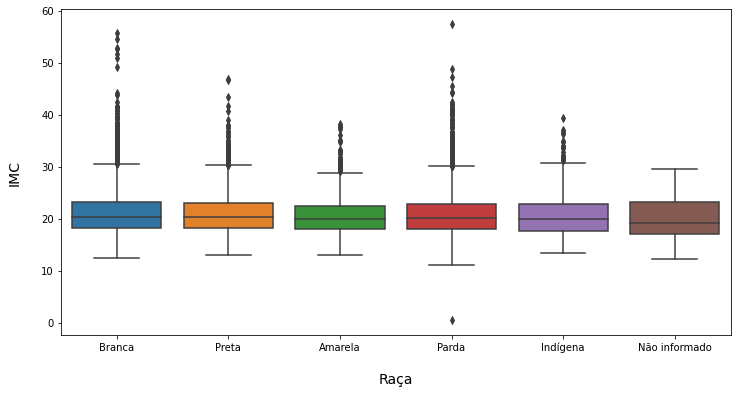

In [73]:
ax = sns.boxplot(x = dados['VB01002'], y = dados['IMC'])
ax.set_xticklabels(labels = raca)
ax.set_xlabel('Raça', fontsize = 14, labelpad = 20)
ax.set_ylabel('IMC', fontsize = 14, labelpad = 20)
ax.figure.set_size_inches((12,6))

### Classe do IMC

#### Criando a coluna CLASSES_IMC

In [74]:
classes = [0, 18.5, 25, 30, 40, 80]
labels = ['MAGREZA', 'NORMAL', 'SOBREPESO', 'OBESIDADE', 'OBESIDADE GRAVE']

dados['CLASSE_IMC'] = pd.cut(x = dados['IMC'], bins = classes, labels = labels, include_lowest = True)

#### Quantidade de ocorrências das classes do IMC

In [75]:
counts_classe_imc = pd.DataFrame(dados.CLASSE_IMC.value_counts(ascending = True))
counts_classe_imc.columns = ['CLASSE_IMC']
counts_classe_imc

,CLASSE_IMC
OBESIDADE GRAVE,42
OBESIDADE,591
SOBREPESO,1760
MAGREZA,4975
NORMAL,9188


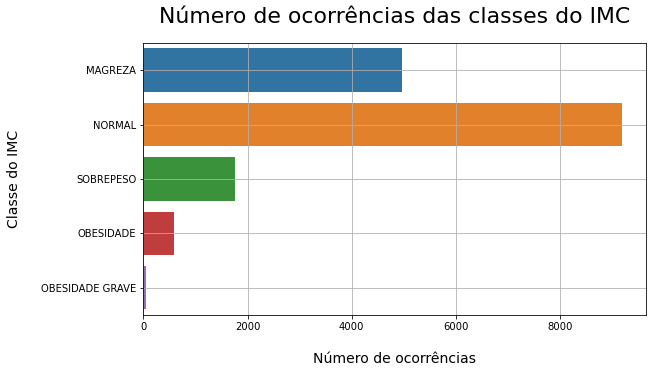

In [76]:
ax = sns.countplot(data = dados, y = 'CLASSE_IMC')
ax.figure.set_size_inches((9,5))
ax.set_title('Número de ocorrências das classes do IMC', fontsize = 22, pad = 20)
ax.set_xlabel('Número de ocorrências', fontsize = 14, labelpad = 20)
ax.set_ylabel('Classe do IMC', fontsize = 14, labelpad = 20)
ax.grid()
ax;

#### Quantidade de alunos <ins>abaixo e acima do peso ideal</ins>

In [77]:
abaixo = dados[dados['IMC'] < 18.5]['CLASSE_IMC'].count()
normal = dados[(dados['IMC'] >= 18.5) & ((dados['IMC'] < 25))]['CLASSE_IMC'].count()
acima = dados[dados['IMC'] >= 25]['CLASSE_IMC'].count()

In [78]:
df_num_absolutos_imc = pd.DataFrame([abaixo, normal, acima])
df_num_absolutos_imc.index = ['Abaixo do peso', 'Peso normal', 'Acima do peso']
df_num_absolutos_imc.columns = ['Quantidade']
df_num_absolutos_imc

,Quantidade
Abaixo do peso,4975
Peso normal,9188
Acima do peso,2393


In [79]:
porc_abaixo = (abaixo / len(dados.CLASSE_IMC) ) * 100
porc_normal = (normal / len(dados.CLASSE_IMC) ) * 100
porc_acima = (acima / len(dados.CLASSE_IMC) ) * 100

In [80]:
df_porc_imc = pd.DataFrame([porc_abaixo, porc_normal, porc_acima])
df_porc_imc.index = ['Abaixo do peso', 'Peso normal', 'Acima do peso']
df_porc_imc.columns = ['Porcentagem']
df_porc_imc

,Porcentagem
Abaixo do peso,30.049529
Peso normal,55.496497
Acima do peso,14.453974


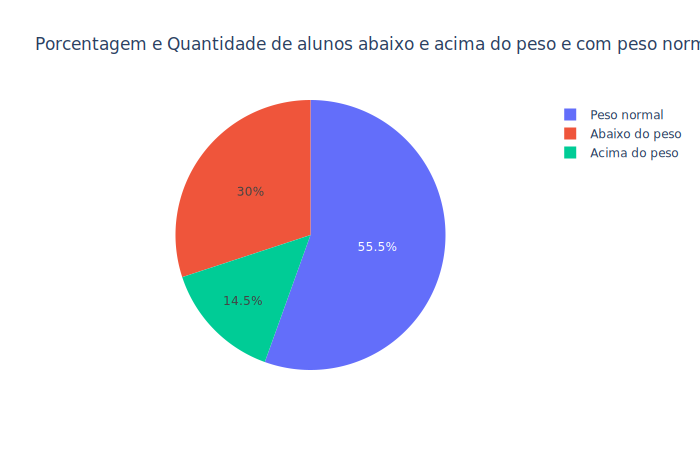

In [81]:
fig = px.pie(df_num_absolutos_imc,
             values='Quantidade',
             names= df_num_absolutos_imc.index,
             labels = ['Abaixo do peso', 'Peso normal', 'Acima do peso'],
             title='Porcentagem e Quantidade de alunos abaixo e acima do peso e com peso normal')
fig.show()

#### <ins>Classes de IMC</ins> de acordo com o <ins>sexo</ins>

##### Números absolutos de cada classe do IMC, de acordo com o sexo

In [82]:
imc_sexo_abs = pd.crosstab(index = dados['CLASSE_IMC'], columns = dados['VB01001'])
imc_sexo_abs.columns = ['Masculino', 'Feminino']
imc_sexo_abs.index.name = 'Classe IMC'
imc_sexo_abs

,Masculino,Feminino
Classe IMC,,
MAGREZA,2620,2355
NORMAL,4512,4676
SOBREPESO,838,922
OBESIDADE,292,299
OBESIDADE GRAVE,25,17


##### Porcentagens de cada classe do IMC, de acordo com o sexo

In [83]:
imc_sexo_porc = pd.crosstab(index = dados['CLASSE_IMC'], columns = dados['VB01001'],
                       normalize = 'index')
imc_sexo_porc.columns = ['Masculino', 'Feminino']
imc_sexo_porc[['Masculino', 'Feminino']] = imc_sexo_porc[['Masculino', 'Feminino']]  * 100
imc_sexo_porc.index.name = 'Classe IMC'
imc_sexo_porc

,Masculino,Feminino
Classe IMC,,
MAGREZA,52.663317,47.336683
NORMAL,49.107532,50.892468
SOBREPESO,47.613636,52.386364
OBESIDADE,49.407783,50.592217
OBESIDADE GRAVE,59.523810,40.476190


In [84]:
imc_sexo_porc.iloc[0]

Masculino    52.663317
Feminino     47.336683
Name: MAGREZA, dtype: float64

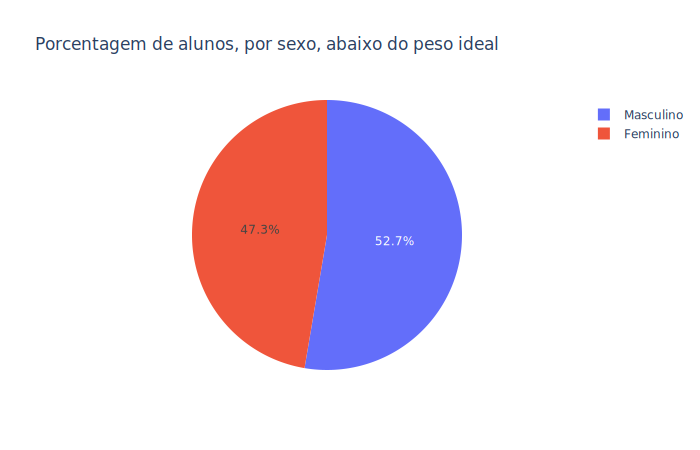

In [85]:
fig = px.pie(imc_sexo_porc,
             values = imc_sexo_porc.iloc[0],
             names= imc_sexo_porc.columns,
             title='Porcentagem de alunos, por sexo, abaixo do peso ideal')
fig.show()

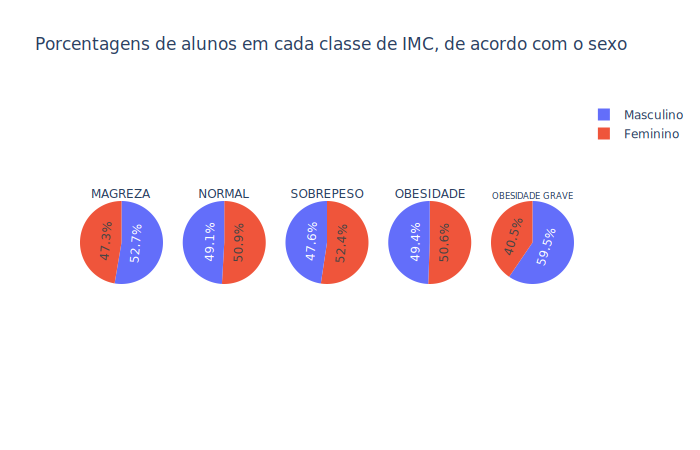

In [86]:
fig = make_subplots(rows=1, cols=5, specs=[[{"type": "pie"}, {"type": "pie"},
                                            {"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=imc_sexo_porc.iloc[0],
     labels=['Masculino', 'Feminino'],
     name="Sexo",
     title = imc_sexo_porc.iloc[0].name), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=imc_sexo_porc.iloc[1],
     labels=['Masculino', 'Feminino'],
     name="Sexo",
     title = imc_sexo_porc.iloc[1].name),
    row=1, col=2)

fig.add_trace(go.Pie(
     values=imc_sexo_porc.iloc[2],
     labels=['Masculino', 'Feminino'],
     name="Sexo",
     title = imc_sexo_porc.iloc[2].name),
    row=1, col=3)

fig.add_trace(go.Pie(
     values=imc_sexo_porc.iloc[3],
     labels=['Masculino', 'Feminino'],
     name="Sexo",
     title = imc_sexo_porc.iloc[3].name),
    row=1, col=4)

fig.add_trace(go.Pie(
     values=imc_sexo_porc.iloc[4],
     labels=['Masculino', 'Feminino'],
     name="Sexo",
    domain=dict(x=[0.5, 1.0]),
     title = imc_sexo_porc.iloc[4].name),
    row=1, col=5)

fig.update_layout(height=300, showlegend=True,
                  title = 'Porcentagens de alunos em cada classe de IMC, de acordo com o sexo')
go.Layout()
fig.show()

In [87]:
imc_sexo_porc.iloc[0].name

'MAGREZA'

#### <ins>Classes de IMC</ins> de acordo com a <ins>raça</ins>

In [88]:
raca_abs

,Nº de respondentes
Raça,
Branca,6575
Preta,1939
Amarela,712
Parda,6726
Indígena,581
Não informado,23


##### Números absolutos

In [89]:
imc_raca_abs = pd.crosstab(index = dados['CLASSE_IMC'], columns = dados['VB01002'])
imc_raca_abs.columns = raca
imc_raca_abs.index.name = 'Classe IMC'
imc_raca_abs

,Branca,Preta,Amarela,Parda,Indígena,Não informado
Classe IMC,,,,,,
MAGREZA,1906,553,222,2084,201,9
NORMAL,3668,1104,410,3704,292,10
SOBREPESO,762,199,53,679,63,4
OBESIDADE,221,78,27,240,25,0
OBESIDADE GRAVE,18,5,0,19,0,0


##### Porcentagens

In [90]:
imc_raca_abs = pd.crosstab(index = dados['CLASSE_IMC'], columns = dados['VB01002'],
                           normalize = 'index')
imc_raca_abs.columns = raca
colunas = imc_raca_abs.columns
imc_raca_abs[colunas] = imc_raca_abs[colunas] * 100
imc_raca_abs.index.name = 'Classe IMC'
print('Normalização por linha')
imc_raca_abs

Normalização por linha


,Branca,Preta,Amarela,Parda,Indígena,Não informado
Classe IMC,,,,,,
MAGREZA,38.311558,11.115578,4.462312,41.889447,4.040201,0.180905
NORMAL,39.921637,12.015673,4.462342,40.313452,3.178058,0.108838
SOBREPESO,43.295455,11.306818,3.011364,38.579545,3.579545,0.227273
OBESIDADE,37.394247,13.197970,4.568528,40.609137,4.230118,0.000000
OBESIDADE GRAVE,42.857143,11.904762,0.000000,45.238095,0.000000,0.000000


##### Distribuição de IMC por raça

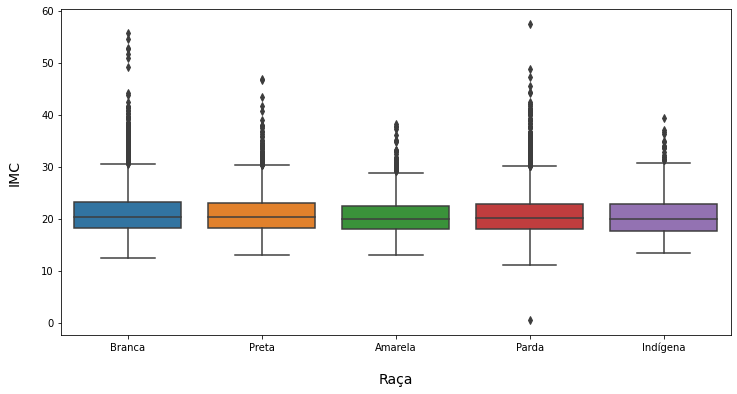

In [91]:
imc_raca = dados.query('VB01002 != 99')

ax = sns.boxplot(x = imc_raca['VB01002'], y = dados['IMC'])
ax.set_xticklabels(labels = colunas[:5])
ax.set_xlabel('Raça', fontsize = 14, labelpad = 20)
ax.set_ylabel('IMC', fontsize = 14, labelpad = 20)
ax.figure.set_size_inches((12,6))

### Grau de satisfação com o corpo

In [92]:
# número de respostas para o grau de satisfação com o corpo
sat = dados[(dados['VB11007'] == 1) | (dados['VB11007'] == 2)]['VB11007'].sum()
indiferente = dados[dados['VB11007'] == 3]['VB11007'].sum()
ins = dados[(dados['VB11007'] == 4) | (dados['VB11007'] == 5)]['VB11007'].sum()
n_informado = dados[dados['VB11007'] == 99]['VB11007'].sum()

In [93]:
# Distribuição das respostas sobre satisfação com o corpo
df_satisfacao_corpo = pd.DataFrame([sat, indiferente, ins, n_informado])
df_satisfacao_corpo.index = ['Satisfeitos ou muito satisfeitos', 'Indiferente',
                             'Insatisfeitos ou muito insatisfeitos', 'Não informado']
df_satisfacao_corpo.index.name = 'Grau de satisfação'
df_satisfacao_corpo.columns = ['Nº de respostas']
df_satisfacao_corpo

,Nº de respostas
Grau de satisfação,
Satisfeitos ou muito satisfeitos,18448
Indiferente,5421
Insatisfeitos ou muito insatisfeitos,12874
Não informado,17919


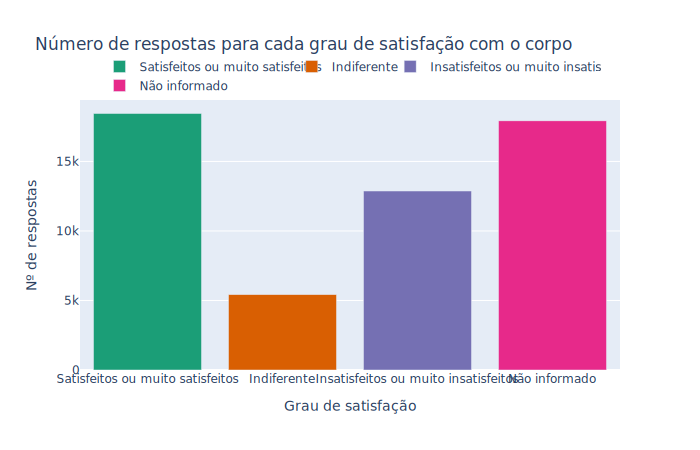

In [94]:
fig = px.bar(data_frame = df_satisfacao_corpo,x = df_satisfacao_corpo.index, y = 'Nº de respostas',
             color = df_satisfacao_corpo.index, color_discrete_sequence=px.colors.qualitative.Dark2,
             title = 'Número de respostas para cada grau de satisfação com o corpo')
fig.update_layout(font_family="Rockwell", legend=dict(
                  title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"))
fig.show()

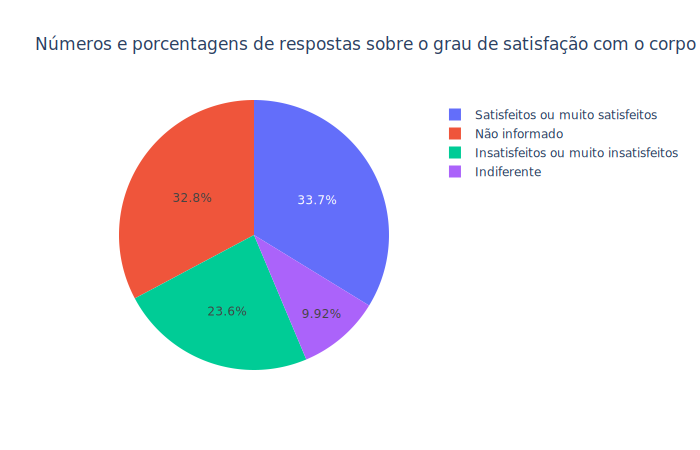

<Figure size 1080x360 with 0 Axes>

In [95]:
plt.figure(figsize = (15,5))
fig = px.pie(df_satisfacao_corpo,
             values='Nº de respostas',
             names= df_satisfacao_corpo.index,
             labels = df_satisfacao_corpo.index,
             title='Números e porcentagens de respostas sobre o grau de satisfação com o corpo')
fig.show()

Apesar de menor, o número de alunos insatisfeitos ou muito insatisfeitos com o próprio corpo equivale a quase 70% dos que se sentem satisfeitos ou muito satisfeitos com o próprio corpo.

# VERIFICAÇÃO DE ALGUMAS HIPÓTESES

## A média do IMC das pessoas insatisfeitas ou muito insatisfeitas com seu corpo está abaixo ou acima do IMC considerado normal (entre 18,5 e 24,9).

In [96]:
ins = dados[(dados['VB11007'] == 4) | (dados['VB11007'] == 5)]

In [97]:
ins['IMC'].mean()

22.871879145965416

Acima verificamos que a média do IMC das pessoas insatisfeitas ou muito insatisfeitas com o próprio corpo é de aproximadamente 23, simplismente dentro do que é considerado um peso normal de acordo com a medida proposta.

In [98]:
n = len(ins['IMC'])
media = ins['IMC'].mean()
std = ins['IMC'].std()

In [99]:
norm.interval(alpha = 0.95, loc = media, scale = std / np.sqrt(n))

(22.689754530190058, 23.054003761740773)

Se repetirmos o experimento várias vezes, em 95% delas a média do IMC populacional de alunos insatisfeitos ou muito insatisfeitos com o próprio corpo estará entre no intervalo entre 22.69 e 23.06.

## Há grande diferença nas porcentagens de alunos satisfeitos ou muito satisfeitos, em relação ao corpo, por raça/cor.

In [100]:
df = pd.crosstab(index = dados['VB01002'], columns = dados['VB11007'])
df.index = raca
df.columns = ['Muito satisfeito(a)', 'Satisfeito(a)','Indiferente','Insatisfeito(a)',
              'Muito insatisfeito(a)', 'Não informado']

In [101]:
df['Total'] = df.sum(axis = 1)
df

,Muito satisfeito(a),Satisfeito(a),Indiferente,Insatisfeito(a),Muito insatisfeito(a),Não informado,Total
Branca,1631,2839,766,1003,271,65,6575
Preta,691,740,165,215,89,39,1939
Amarela,172,309,93,98,34,6,712
Parda,1923,2793,724,936,290,60,6726
Indígena,185,229,58,72,30,7,581
Não informado,6,10,1,2,0,4,23


### Porcentagem de alunos satisfeitos ou muito satisfeitos para cada cor/raça

In [102]:
# quantidade de respostas de satisfação para cada raça/cor
sat = dados[(dados['VB11007'] == 1) | (dados['VB11007'] == 2)]['VB01002'].value_counts().sort_index()
sat

1     4470
2     1431
3      481
4     4716
5      414
99      16
Name: VB01002, dtype: int64

In [103]:
satisfacao_cada_raca = pd.DataFrame(sat)
satisfacao_cada_raca.index = raca
satisfacao_cada_raca.index.name = 'Raça'
satisfacao_cada_raca.columns = ['Nº de alunos satisfeitos']
satisfacao_cada_raca

,Nº de alunos satisfeitos
Raça,
Branca,4470
Preta,1431
Amarela,481
Parda,4716
Indígena,414
Não informado,16


In [104]:
satisfacao_cada_raca['Respondentes x Raça'] = raca_abs['Nº de respondentes']

In [105]:
satisfacao_cada_raca

,Nº de alunos satisfeitos,Respondentes x Raça
Raça,,
Branca,4470,6575
Preta,1431,1939
Amarela,481,712
Parda,4716,6726
Indígena,414,581
Não informado,16,23


In [106]:
valores = dados['VB01002'].unique()
valores.sort()
valores

array([ 1,  2,  3,  4,  5, 99], dtype=int64)

In [107]:
for i in valores:
    satisfacao_cada_raca['Porcentagem_raca'] = (satisfacao_cada_raca['Nº de alunos satisfeitos'] / satisfacao_cada_raca['Respondentes x Raça']) * 100
    break

In [108]:
satisfacao_cada_raca

,Nº de alunos satisfeitos,Respondentes x Raça,Porcentagem_raca
Raça,,,
Branca,4470,6575,67.984791
Preta,1431,1939,73.800928
Amarela,481,712,67.556180
Parda,4716,6726,70.115968
Indígena,414,581,71.256454
Não informado,16,23,69.565217


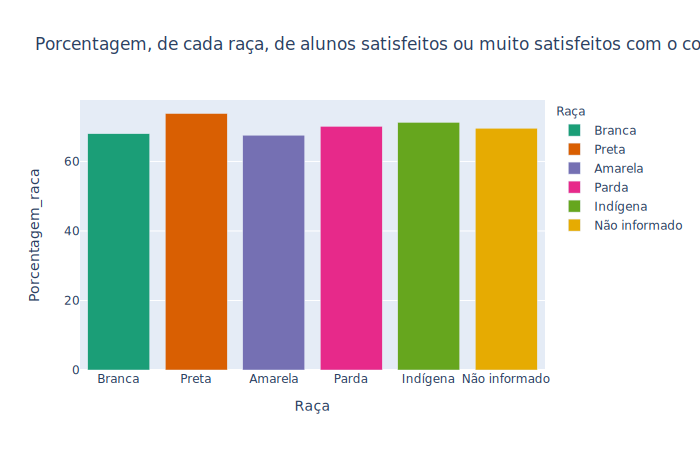

<Figure size 1080x432 with 0 Axes>

In [109]:
# gráfico de barras
plt.figure(figsize = (15,6));
fig = px.bar(data_frame = satisfacao_cada_raca,
                x = satisfacao_cada_raca.index,
                y = 'Porcentagem_raca',
                title = 'Porcentagem, de cada raça, de alunos satisfeitos ou muito satisfeitos com o corpo',
                color = satisfacao_cada_raca.index,
                color_discrete_sequence=px.colors.qualitative.Dark2)
fig.show()

O gráfico acima nos mostra a porcentagem de alunos de cada cor/raça que estavam satisfeitos e muito satisfeitos com o corpo.

Podemos perceber que não há grande diferença entre porcentagens.

A maior diferença entre as porcentagens fica em aproximadamente 5.25%, entre a cor/raça preta (73.80% estavam satisfeitos ou muito satisfeitos) e a cor/raça amarela (67.55% estavam satisfeitos ou muito satisfeitos).

## As alunas tendem a se sentir insatisfeitas ou muito insatisfeitas com o próprio corpo mais do que os alunos.

In [110]:
# alunos que estavam insatisfeitos ou muito insatisfeitos
insat = dados[(dados['VB11007'] == 4) | (dados['VB11007'] == 5)]

In [111]:
# quantidade de alunos e alunas insatisfeitos ou muito insatisfeitos
num_insat = insat['VB01001'].value_counts().sort_index()

In [112]:
# quantidade de alunos, de cada sexo, que responderam a pesquisa
num_alunos_alunas = dados['VB01001'].value_counts()

In [113]:
df_alunos_alunas = pd.DataFrame(num_alunos_alunas)
df_alunos_alunas.index = ['Masculino', 'Feminino']
df_alunos_alunas.columns = ['Nº respondentes']

In [114]:
df_alunos_alunas['Muito OU insatisfeitos'] = num_insat.values

In [115]:
df_alunos_alunas

,Nº respondentes,Muito OU insatisfeitos
Masculino,8287,1046
Feminino,8269,1994


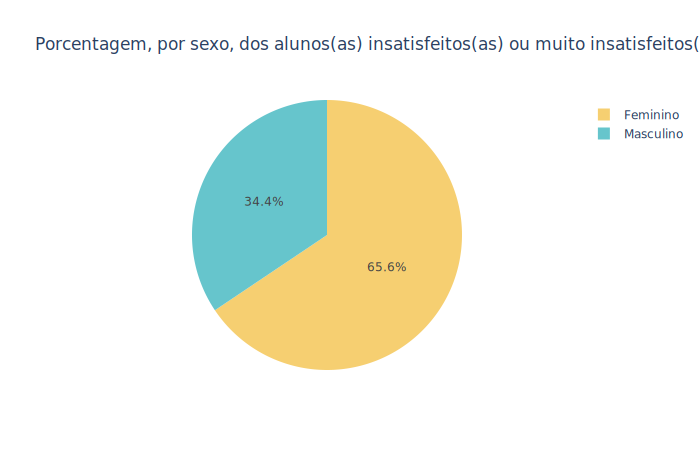

<Figure size 1080x432 with 0 Axes>

In [116]:
plt.figure(figsize = (15,6))
px.pie(data_frame = df_alunos_alunas,
       values = 'Muito OU insatisfeitos',
       names = df_alunos_alunas.index,
       title = 'Porcentagem, por sexo, dos alunos(as) insatisfeitos(as) ou muito insatisfeitos(as) com o corpo',
       color = df_alunos_alunas.index,
       color_discrete_sequence=px.colors.qualitative.Pastel)

Dos 3040 alunos e alunas que se sentem insatisfeitos ou muito insatisfeitos em relação ao corpo, vemos que as meninas representam 65.6% desse número, contra 34.4% dos meninos. 

Temos o total de alunos e alunas, que responderam o questionário, praticamente igual, sendo 8287 para alunos e 8269 alunas. Com isso, parece que as alunas tendem a se sentir mais pressionadas em relação ao seu corpo, talvez por pressão midiática, pela sociedade machista ou por outros motivos que podem influenciar nesse sentimento.

## O fato de o aluno(a) ter ficado "magoado, incomodado, aborrecido, ofendido ou humilhado" com frequência quando seus colegas "esculacharam, zoaram, mangaram, intimidaram ou caçoaram" pode ter levado-o a ter o IMC abaixo ou acima de um IMC normal .

**Pergunta VB07007:**
<ins>"NOS ÚLTIMOS 30 DIAS, com que frequência algum dos seus colegas de escola te esculacharam, zoaram, mangaram, intimidaram ou caçoaram tanto que você ficou magoado, incomodado, aborrecido, ofendido ou humilhado?"</ins>


Vamos analisar, primeiramente, as quantidades e as porcentagens das respostas.

### Verificando a quantidade de cada resposta, exceto a resposta 99 ("Não informado") :

In [117]:
dados_intimidacao = pd.DataFrame(dados['VB07007'][dados['VB07007'] != 99].value_counts())
dados_intimidacao.index = ['Nunca', 'Raramente', 'Às vezes', 'Na maior parte do tempo', 'Sempre']
dados_intimidacao.index.name = 'Resposta'
dados_intimidacao.columns = ['Quantidade']
dados_intimidacao

,Quantidade
Resposta,
Nunca,9147
Raramente,3541
Às vezes,2550
Na maior parte do tempo,670
Sempre,545


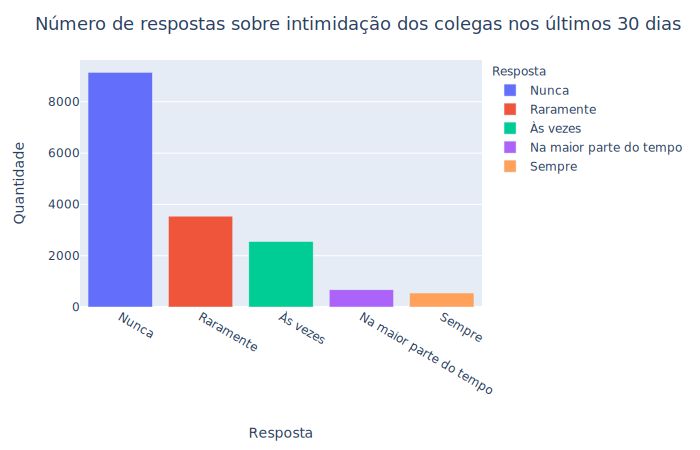

In [118]:
fig = px.bar(data_frame = dados_intimidacao, 
       x = dados_intimidacao.index, 
       y = dados_intimidacao['Quantidade'],
      color = dados_intimidacao.index, 
      )
fig.update_xaxes(title_text='Resposta', title_font = {"size": 14}, title_standoff = 30)
fig.update_yaxes(title_text='Quantidade', title_font = {"size": 14}, title_standoff = 15)
fig.update_layout(title_text= 'Número de respostas sobre intimidação dos colegas nos últimos 30 dias',
                 title_font = {"size": 18})
fig.show()

O gráfico acima nos mostra que as respostas "Na maior parte do tempo" e "Sempre" possuem, cada uma, menos de 700 ocorrências, enquanto 9147 alunos declararam que nunca sofreram nenhum tipo de "intimidação" de seus colegas nos últimos 30 dias. Veremos agora a porcentagem representada por cada resposta.

### Verificando a porcentagem, de cada resposta, exceto a resposta 99 ("Não informado") :

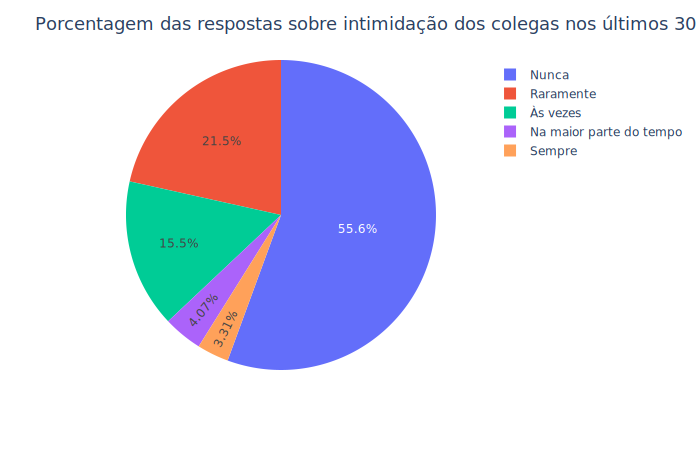

In [119]:
fig = px.pie(data_frame = dados_intimidacao,
             names = dados_intimidacao.index,
             values = 'Quantidade')
fig.update_layout(title_text= 'Porcentagem das respostas sobre intimidação dos colegas nos últimos 30 dias',
                 title_font = {"size": 18})
fig.show()

### Para a análise da hipótese, vamos assumir a possibilidade de que essa "perseguição" ao aluno pode ter se prolongado por mais de 30 dias, para que haja um intervalo maior em uma mudança regular em seu peso e, consequentemente, no seu IMC (entre 18,5 e 24,9).

In [120]:
intimidacao = dados[dados['VB07007'] != 99].copy()

In [121]:
# dados dos alunos que responderam "Na maior parte do tempo" (resposta 4) e 
# "Sempre" (resposta 5).
intimidacao_maior_tempo_sempre = intimidacao.query("(VB07007 == 4) | (VB07007 == 5)")
intimidacao_maior_tempo_sempre['IMC'].mean()

21.04024287965268

In [122]:
# dados dos alunos que responderam "As vezes" (resposta 3).
intimidacao_as_vezes = dados.query("(VB07007 == 3)")
intimidacao_as_vezes['IMC'].mean()

20.805129149814793

In [123]:
# dados dos alunos que responderam "Nunca" (resposta 1) e "Raramente" (resposta 2).
intimidacao_nunca_raramente = dados.query("(VB07007 == 1) | (VB07007 == 2)")
intimidacao_nunca_raramente['IMC'].mean()

20.987353062104408

Com as médias calculadas acima não podemos afirmar que sofreram "intimidação" com maior frequência tendem a possuir um IMC abaixo ou acima do normal. Agora vamos visualizar a distribuição dos dados para termos maior grau de certeza:

In [124]:
respostas = {1: 'Nunca', 2: 'Raramente', 3: 'As vezes', 4: 'Na maior parte do tempo', 5: 'Sempre'}
intimidacao['VB07007'] = intimidacao['VB07007'].map(respostas)
intimidacao.rename(columns = {'VB07007': 'Intimidação nos últimos 30 dias'}, inplace = True)

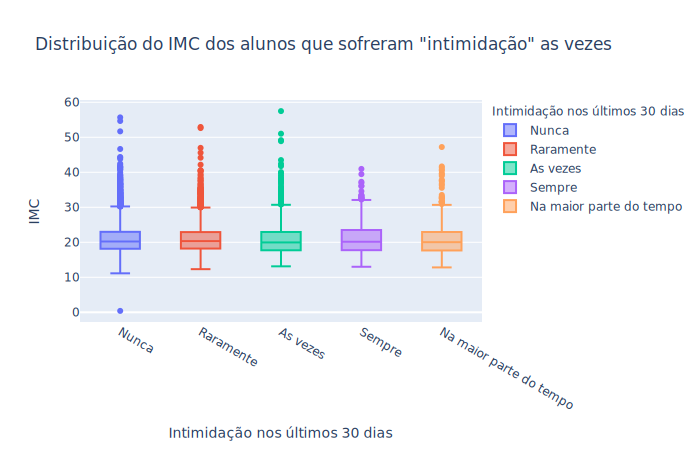

In [125]:
fig = px.box(data_frame = intimidacao, x = 'Intimidação nos últimos 30 dias', y = 'IMC', 
      color = 'Intimidação nos últimos 30 dias',
      title = 'Distribuição do IMC dos alunos que sofreram "intimidação" as vezes')
fig.show()

Como podemos perceber na visualização acima, parece que a frequência com que o aluno(a) sofre algum tipo de "intimidação" não influencia no seu IMC.
Com isso, rejeitamos a nossa hipótese nula.